In [2]:
import pandas as pd
import matplotlib as mpl
mpl.interactive(True)
#mpl.interactive(False)
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
#
#ERA5 BB data
#

#import data
ds=xr.open_mfdataset('Documents/Summer_2021/bb_data/ERA5/adaptor.mars*.nc', combine='by_coords', engine='netcdf4')
#this dataset has the runoff term vv
dsr=xr.open_mfdataset('Documents/Summer_2021/bb_data/ERA5(evap)/adaptor.mars*.nc', combine='by_coords', engine='netcdf4')

#indices of leap year
ly_2000=np.arange(10176,10200)
ly_2004=np.arange(45240,45264)
ly_2008=np.arange(80304,80328)
ly_2012=np.arange(115368,115392)
ly_2016=np.arange(150432,150456)
ly_2020=np.arange(185496,185520)

#we delete all leap days for ease of analysis
leap_year=np.append(np.append(np.append(np.append(np.append(ly_2000, ly_2004),ly_2008),ly_2012),ly_2016), ly_2020)
years=np.arange(1999,2021)

d={}
d['Qsw']=np.nanmean(np.reshape(np.delete(ds.msnswrf.values, leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)
d['Qlw']=np.nanmean(np.reshape(np.delete(ds.msnlwrf.values, leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)
d['Qlat']=np.nanmean(np.reshape(np.delete(ds.mslhf.values, leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)
d['Qsen']=np.nanmean(np.reshape(np.delete(ds.msshf.values, leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)
d['u10']=np.nanmean(np.reshape(np.delete(ds.u10.values, leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)
d['v10']=np.nanmean(np.reshape(np.delete(ds.v10.values, leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)
d['evap']=np.nanmean(np.reshape(np.delete(ds.e.values, leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)
d['precip']=np.nanmean(np.reshape(np.delete(ds.tp.values, leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)
d['ro']=np.nanmean(np.reshape(np.delete(dsr.ro.values, leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)
d['sst']=np.nanmean(np.reshape(np.delete(ds.sst.values, leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)
d['lon']=ds.longitude.values
d['lat']=ds.latitude.values
d['t']=np.reshape(np.delete(ds.time.values, leap_year, axis=0), (len(years),365*24))
d['Q'] =ds.msnswrf.values + ds.msnlwrf.values + ds.mslhf.values + ds.msshf.values
d['Q']=np.nanmean(np.reshape(np.delete(d['Q'], leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)
d['nete']=ds.e.values + ds.tp.values + dsr.ro.values
d['nete']=np.nanmean(np.reshape(np.delete(d['nete'], leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)




summer_ind=range(3624,5832)

#the number of hours in each season
summer_hours=2208
winter_hours=2160

#bb gridcell and ocean gridcell bounds
bb_lat_bounds=range(1,3)
bb_lon_bounds=range(1,3)

ocean_lat_bounds=range(2,4)
ocean_lon_bounds=range(2,4)


<ipython-input-2-6e533df7f697>:45: RuntimeWarning: Mean of empty slice
  d['sst']=np.nanmean(np.reshape(np.delete(ds.sst.values, leap_year, axis=0), (len(years),365*24,len(ds.latitude.values),len(ds.longitude.values))), axis=0)


In [ ]:
#wind speed plots

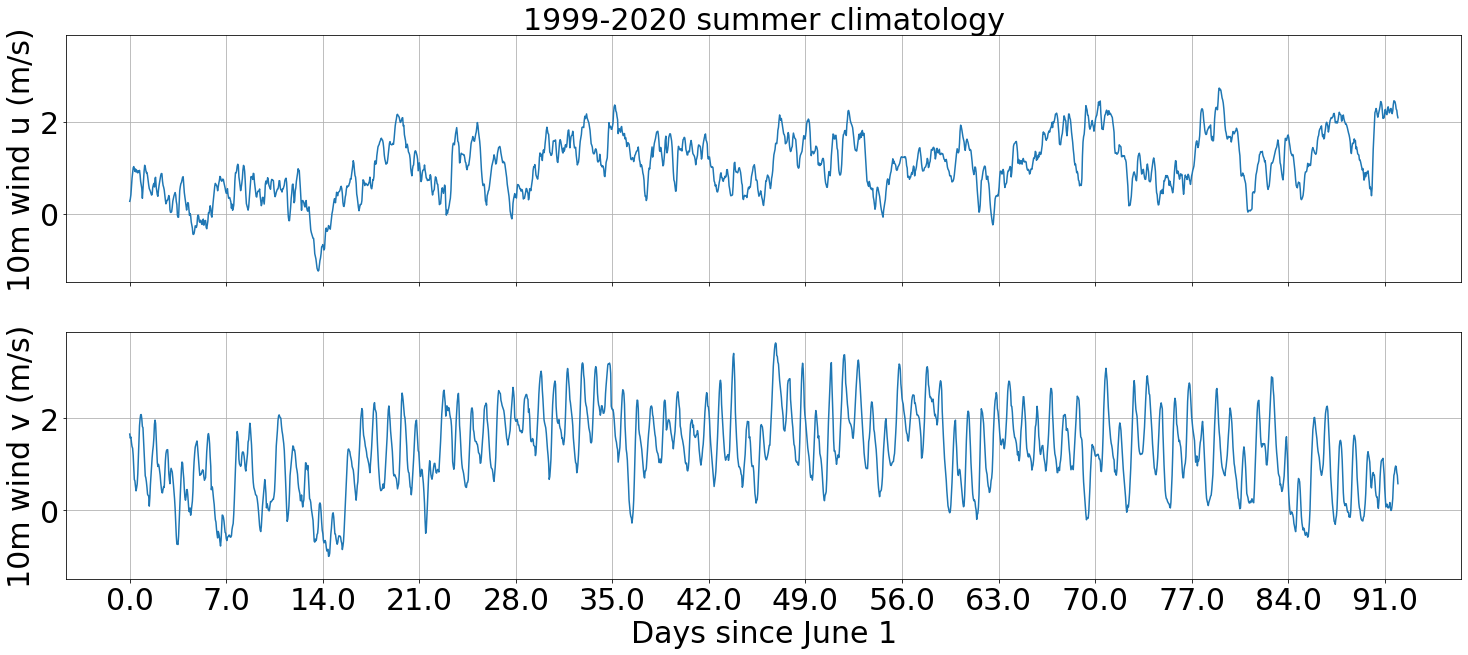

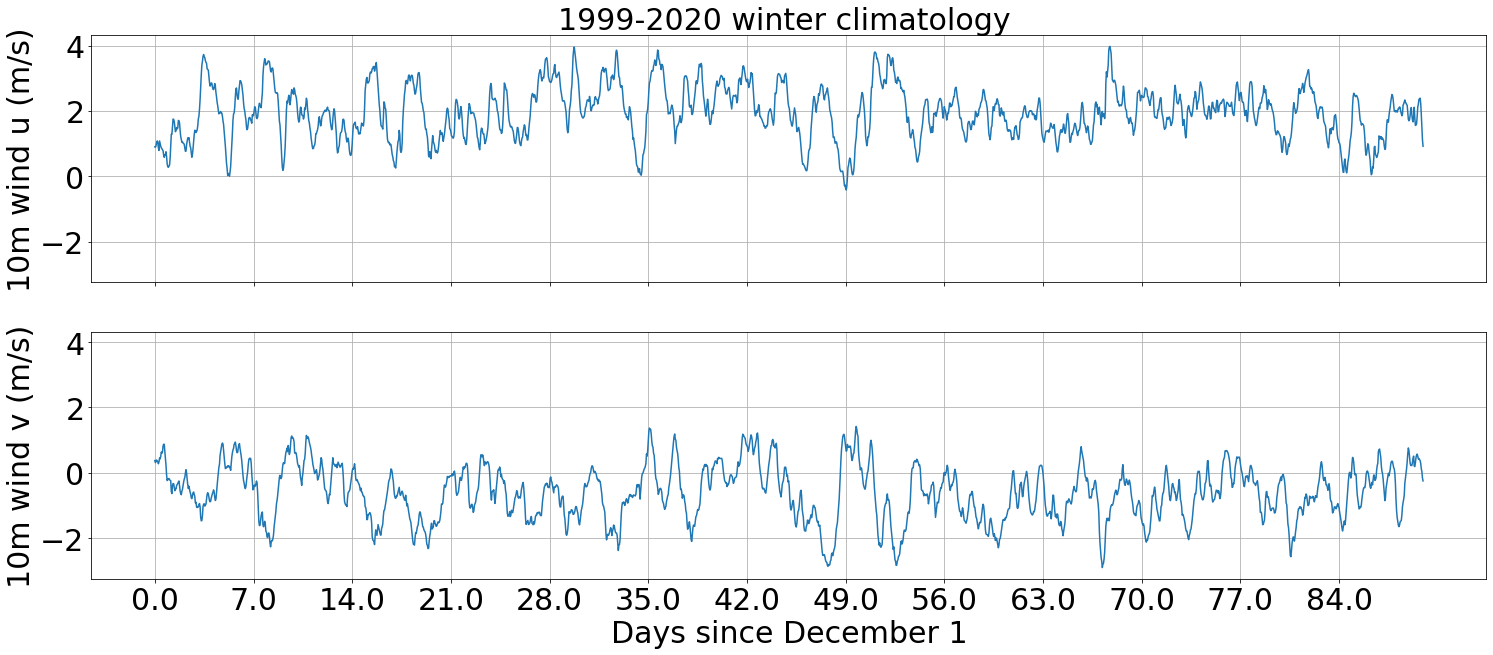

In [17]:
plt.close()

#summer
##                FIGURE 1
f, ((ax1, ax2))=plt.subplots(2,1, sharey=True, sharex=True, figsize=(25,10))

ax1.plot(np.arange(summer_hours),np.nanmean(d['u10'][summer_ind,bb_lat_bounds,bb_lon_bounds], axis=(1,2)))
ax1.set_ylabel('10m wind u (m/s)', fontsize=30)
ax1.set_xticks(np.arange(summer_hours/24)[::2])
ax1.set_title('1999-2020 summer climatology', fontsize=30)
ax1.tick_params(labelsize=30)
ax1.grid()

ax2.plot(np.arange(summer_hours),np.nanmean(d['v10'][summer_ind,bb_lat_bounds,bb_lon_bounds], axis=(1,2)))
ax2.set_ylabel('10m wind v (m/s)', fontsize=30)
ax2.set_xticks(np.arange(summer_hours)[::7*24])
ax2.set_xticklabels(np.arange(summer_hours/24)[::7])
ax2.tick_params(labelsize=30)
ax2.grid()
ax2.set_xlabel('Days since June 1', fontsize=30)



#winter
##                FIGURE 2
#since the calender year starts with january, but winter starts with december (of the previous calender year)
#we have to append the december (which is at the end of the array) to january&february (which is at the beginning of the array)
dec_index=range(8016,8760)
jan_feb_index=range(0,1416)

winter_time=np.append(d['t'][0][dec_index], d['t'][0][jan_feb_index])
winter_u10=np.append(d['u10'][dec_index], d['u10'][jan_feb_index], axis=0)
winter_v10=np.append(d['v10'][dec_index], d['v10'][jan_feb_index], axis=0)

f, ((ax1, ax2))=plt.subplots(2,1, sharey=True, sharex=True, figsize=(25,10))

ax1.plot(np.arange(winter_hours),np.nanmean(winter_u10[:,bb_lat_bounds,bb_lon_bounds], axis=(1,2)))
ax1.set_ylabel('10m wind u (m/s)', fontsize=30)
ax1.set_xticks(np.arange(winter_hours/24)[::2])
ax1.set_title('1999-2020 winter climatology ', fontsize=30)
ax1.grid()
ax1.tick_params(labelsize=30)

ax2.plot(np.arange(winter_hours),np.nanmean(winter_v10[:,bb_lat_bounds,bb_lon_bounds], axis=(1,2)))
ax2.set_ylabel('10m wind v (m/s)', fontsize=30)
ax2.tick_params(labelsize=30)
ax2.set_xticks(np.arange(winter_hours)[::7*24])
ax2.set_xticklabels(np.arange(winter_hours/24)[::7])
ax2.set_xlabel('Days since December 1', fontsize=30)
ax2.grid()

In [3]:
#freshwater flux plots

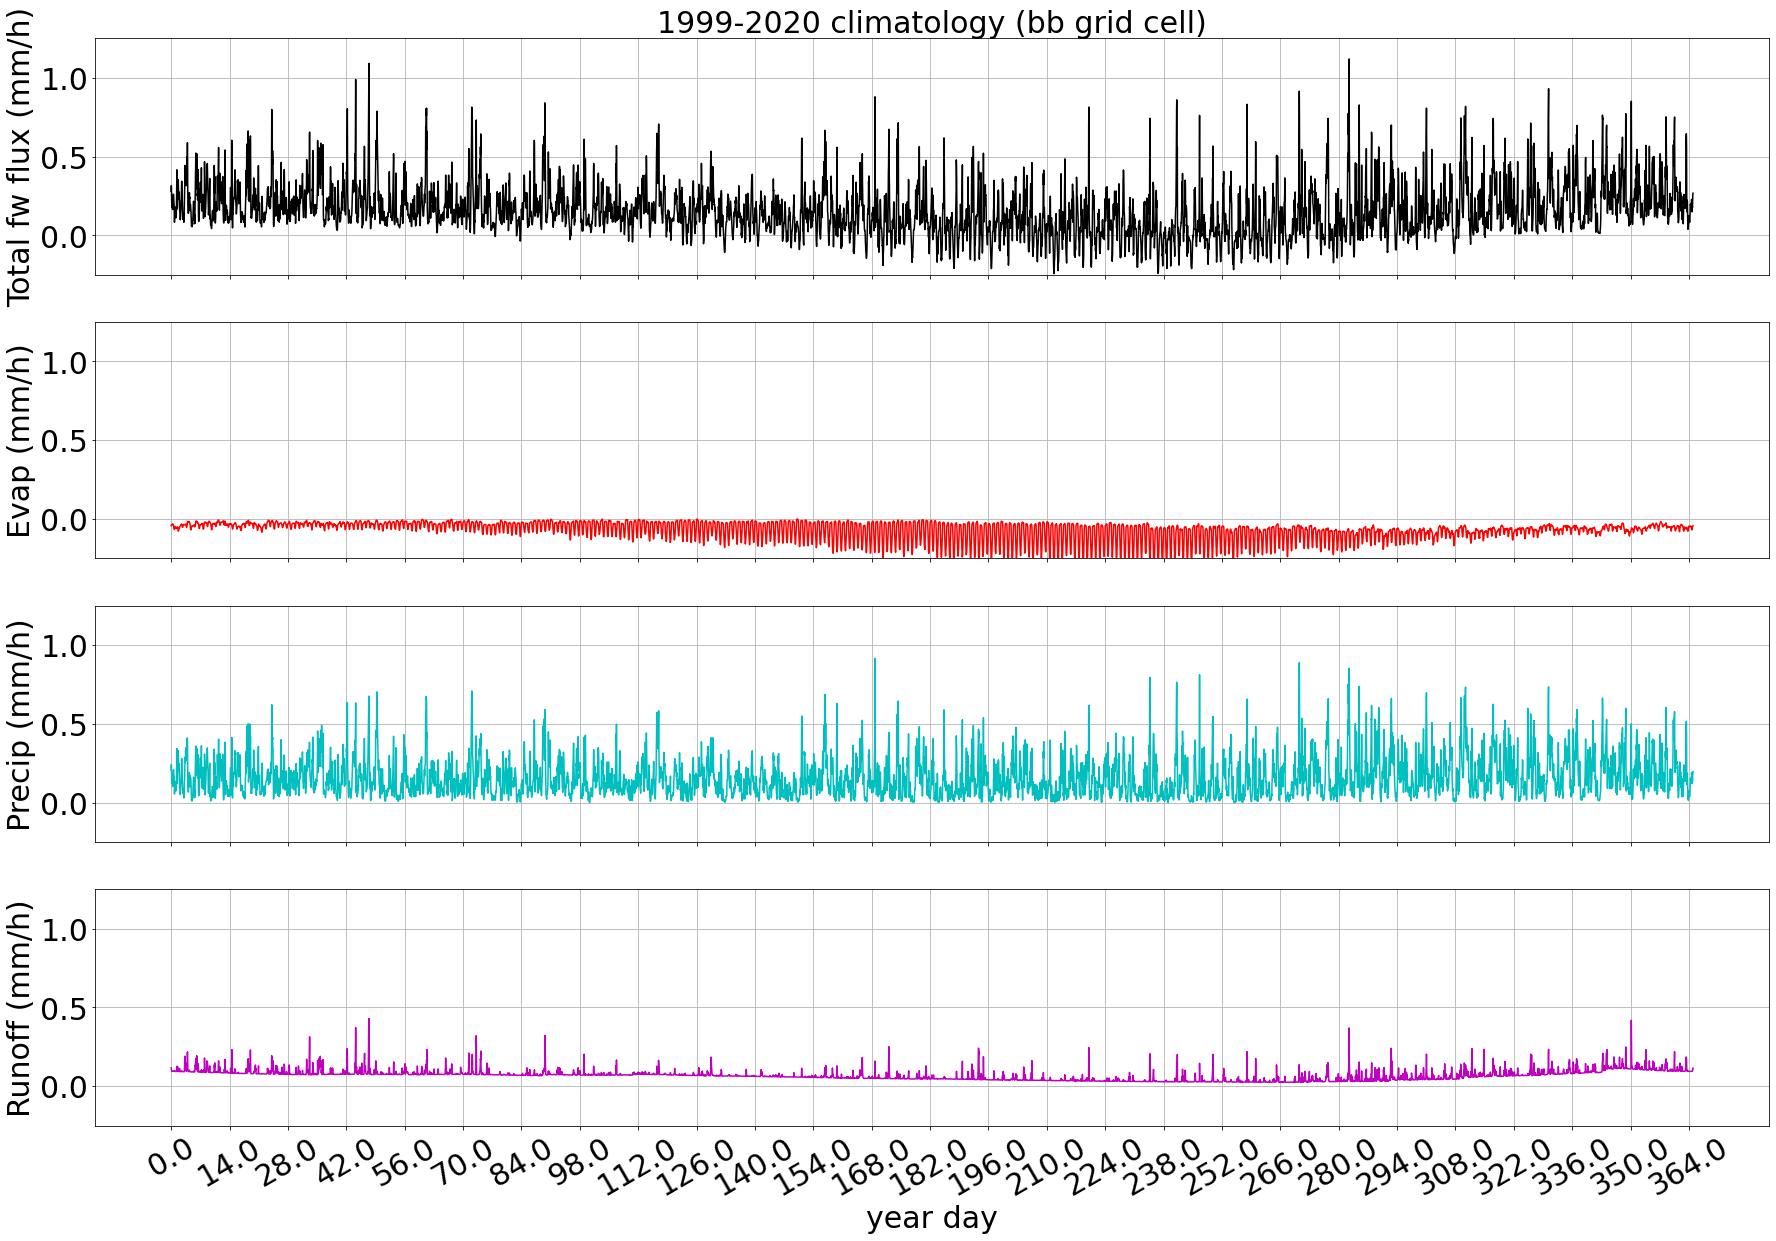

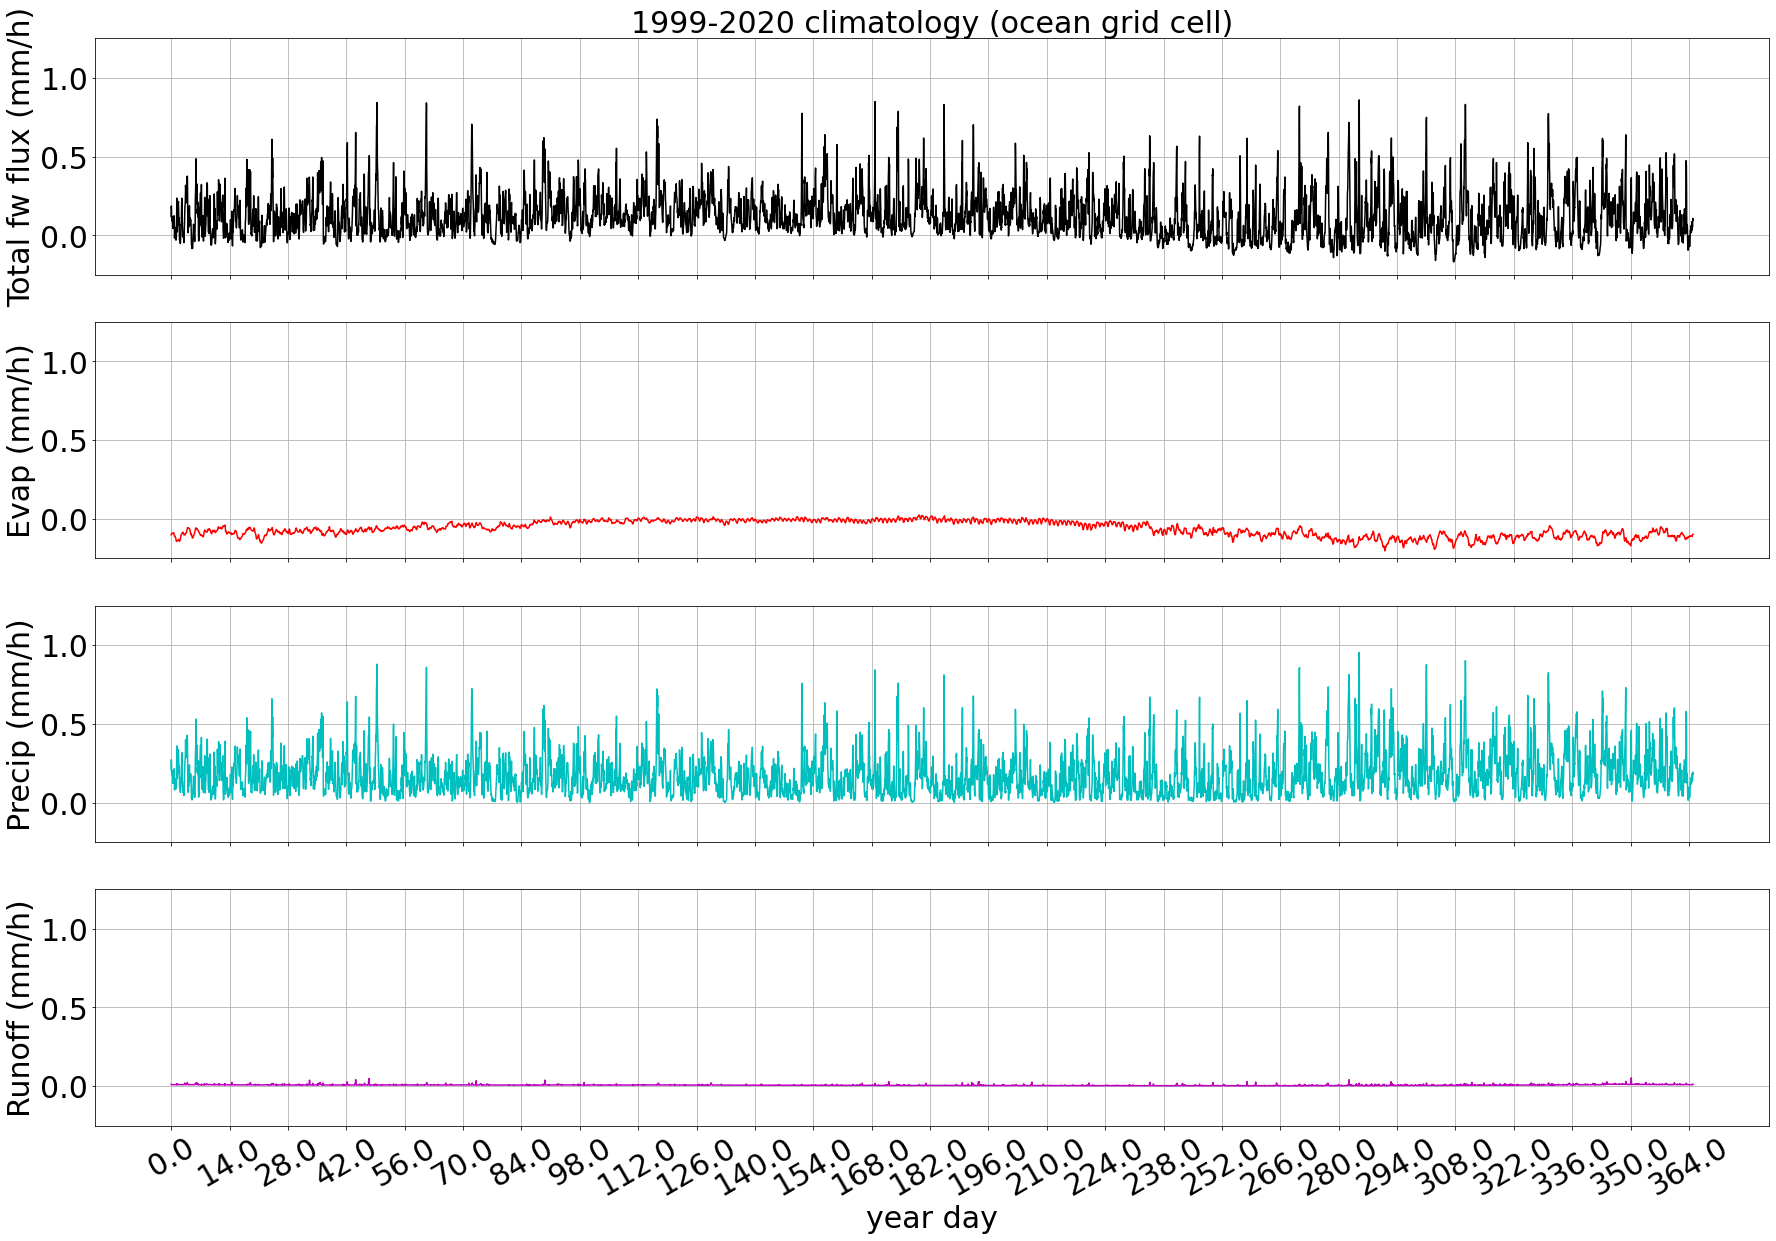

In [6]:
#
#Annual timeseries climatology
#

#the index of the bedford basin gridcell is[:,1:3,1:3]
#the index of the ocean gridcell is[:,2:4,2:4]

plt.close()
#Bedford Basin gridcell
##                FIGURE 9
f, ((ax1, ax2, ax3, ax4))=plt.subplots(4,1, sharey=True, sharex=True, figsize=(30,20))

#times 1000 since we are plotting in mm instead of m
ax1.plot(d['t'][0],np.nanmean((d['nete']*1000)[:,bb_lat_bounds,bb_lon_bounds], axis=(1,2)), 'k')
ax2.plot(d['t'][0],np.nanmean((d['evap']*1000)[:,bb_lat_bounds,bb_lon_bounds], axis=(1,2)), 'r')
ax3.plot(d['t'][0],np.nanmean((d['precip']*1000)[:,bb_lat_bounds,bb_lon_bounds], axis=(1,2)), 'c')
ax4.plot(d['t'][0],np.nanmean((d['ro']*1000)[:,bb_lat_bounds,bb_lon_bounds], axis=(1,2)), 'm')


ax4.set_xticks(d['t'][0][::24*14])
ax4.set_xlabel('year day', fontsize=30)
ax4.set_xticklabels(np.arange(24*365)[::24*14]/24, rotation=30)

ax1.set_ylim(-0.25,1.25)
ax2.set_ylim(-0.25,1.25)
ax3.set_ylim(-0.25,1.25)
ax4.set_ylim(-0.25,1.25)

ax1.set_ylabel('Total fw flux (mm/h)', fontsize=30)
ax2.set_ylabel('Evap (mm/h)', fontsize=30)
ax3.set_ylabel('Precip (mm/h)', fontsize=30)
ax4.set_ylabel('Runoff (mm/h)', fontsize=30)

ax1.set_title('1999-2020 climatology (bb grid cell)', fontsize=30)
ax1.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
ax3.tick_params(labelsize=30)
ax4.tick_params(labelsize=30)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()


#ocean gridcell
##                FIGURE 10
f, ((ax1, ax2, ax3, ax4))=plt.subplots(4,1, sharey=True, sharex=True, figsize=(30,20))

ax1.plot(d['t'][0],np.nanmean((d['nete']*1000)[:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2)), 'k')
ax2.plot(d['t'][0],np.nanmean((d['evap']*1000)[:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2)), 'r')
ax3.plot(d['t'][0],np.nanmean((d['precip']*1000)[:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2)), 'c')
ax4.plot(d['t'][0],np.nanmean((d['ro']*1000)[:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2)), 'm')


ax4.set_xticks(d['t'][0][::24*14])
ax4.set_xlabel('year day', fontsize=30)
ax4.set_xticklabels(np.arange(24*365)[::24*14]/24, rotation=30)

ax1.set_ylim(-0.25,1.25)
ax2.set_ylim(-0.25,1.25)
ax3.set_ylim(-0.25,1.25)
ax4.set_ylim(-0.25,1.25)

ax1.set_ylabel('Total fw flux (mm/h)', fontsize=30)
ax2.set_ylabel('Evap (mm/h)', fontsize=30)
ax3.set_ylabel('Precip (mm/h)', fontsize=30)
ax4.set_ylabel('Runoff (mm/h)', fontsize=30)

ax1.set_title('1999-2020 climatology (ocean grid cell)', fontsize=30)
ax1.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
ax3.tick_params(labelsize=30)
ax4.tick_params(labelsize=30)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

Text(0.5, 0.98, 'daily freshwater flux climatology: years 1999-2020, dates 12-14 - 12-28')

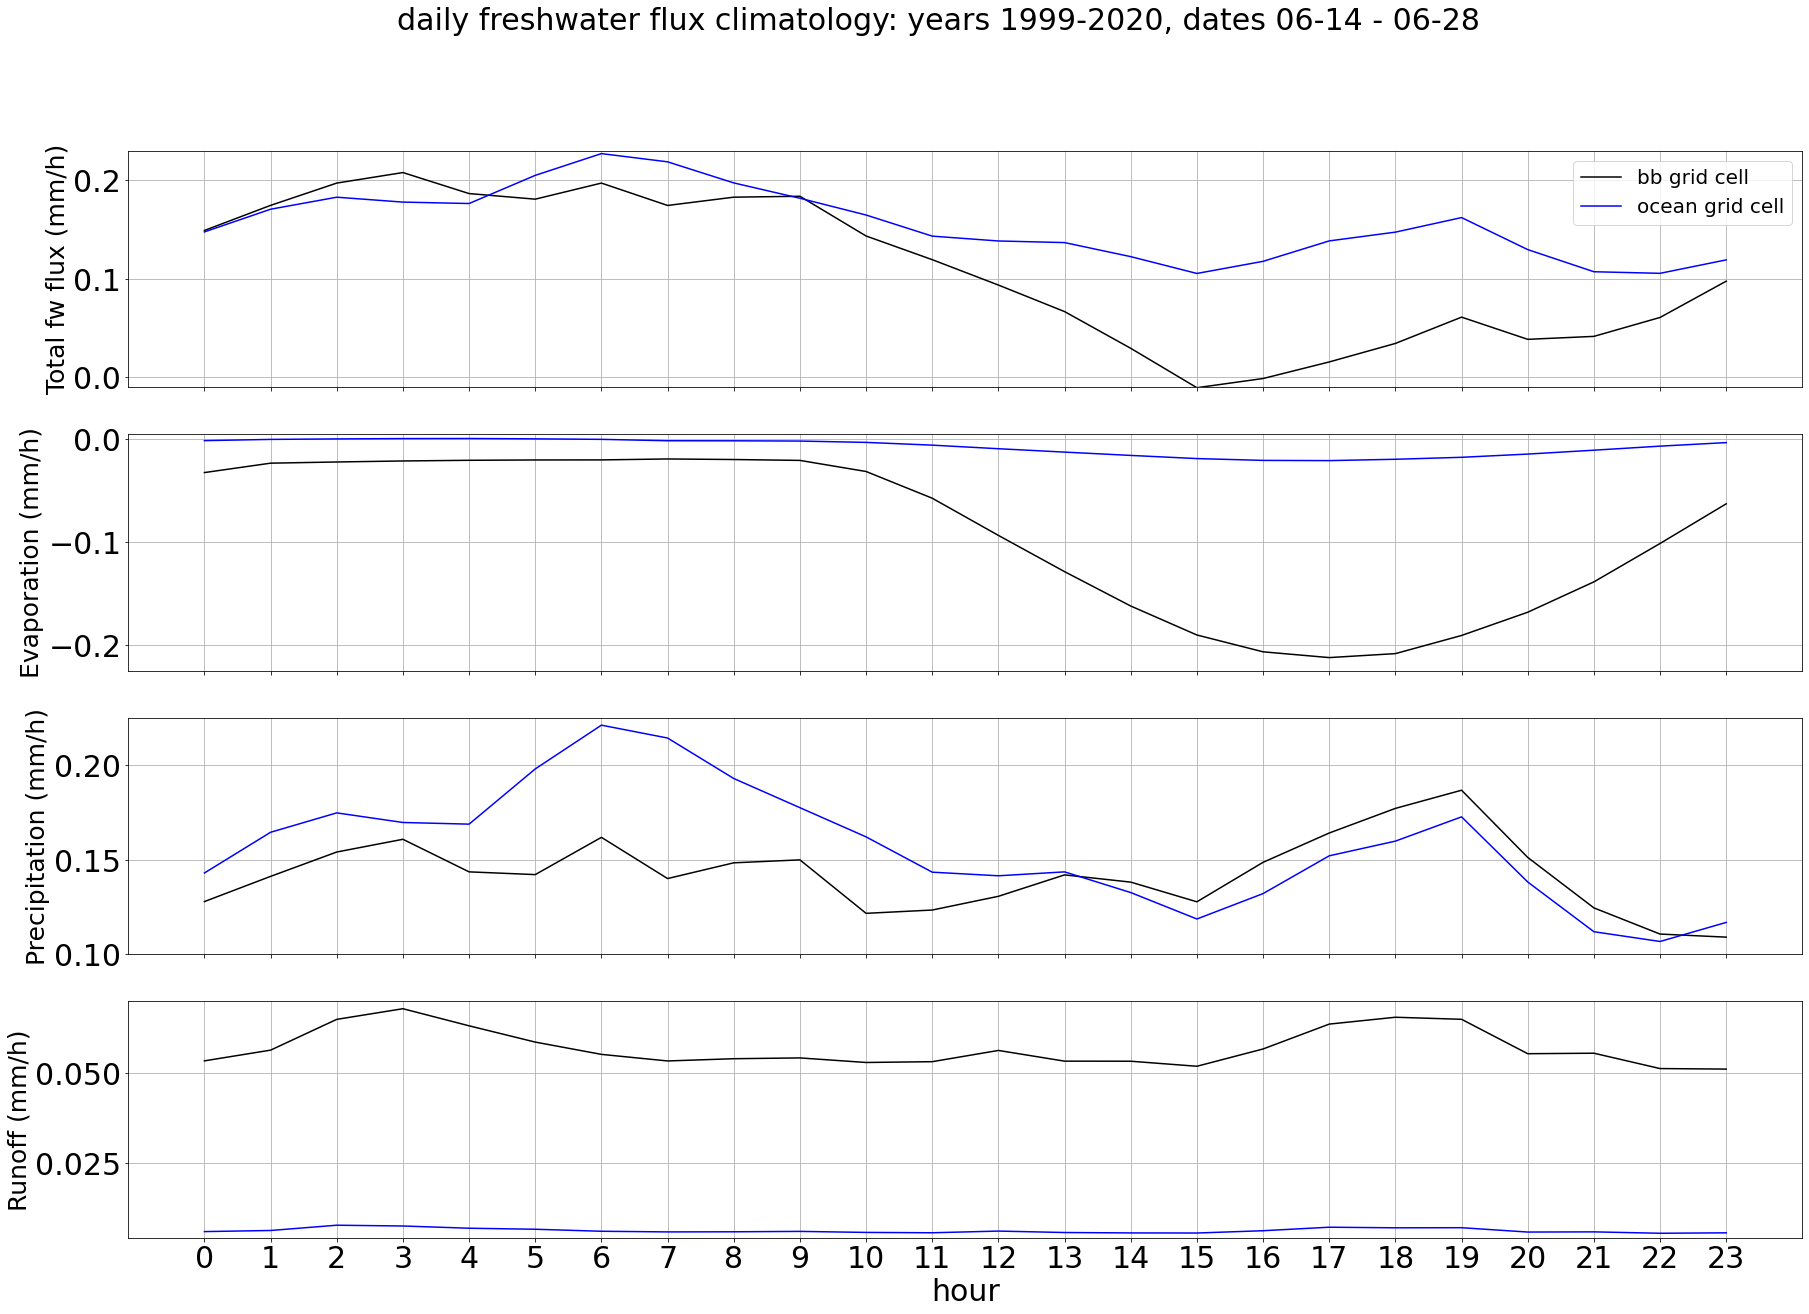

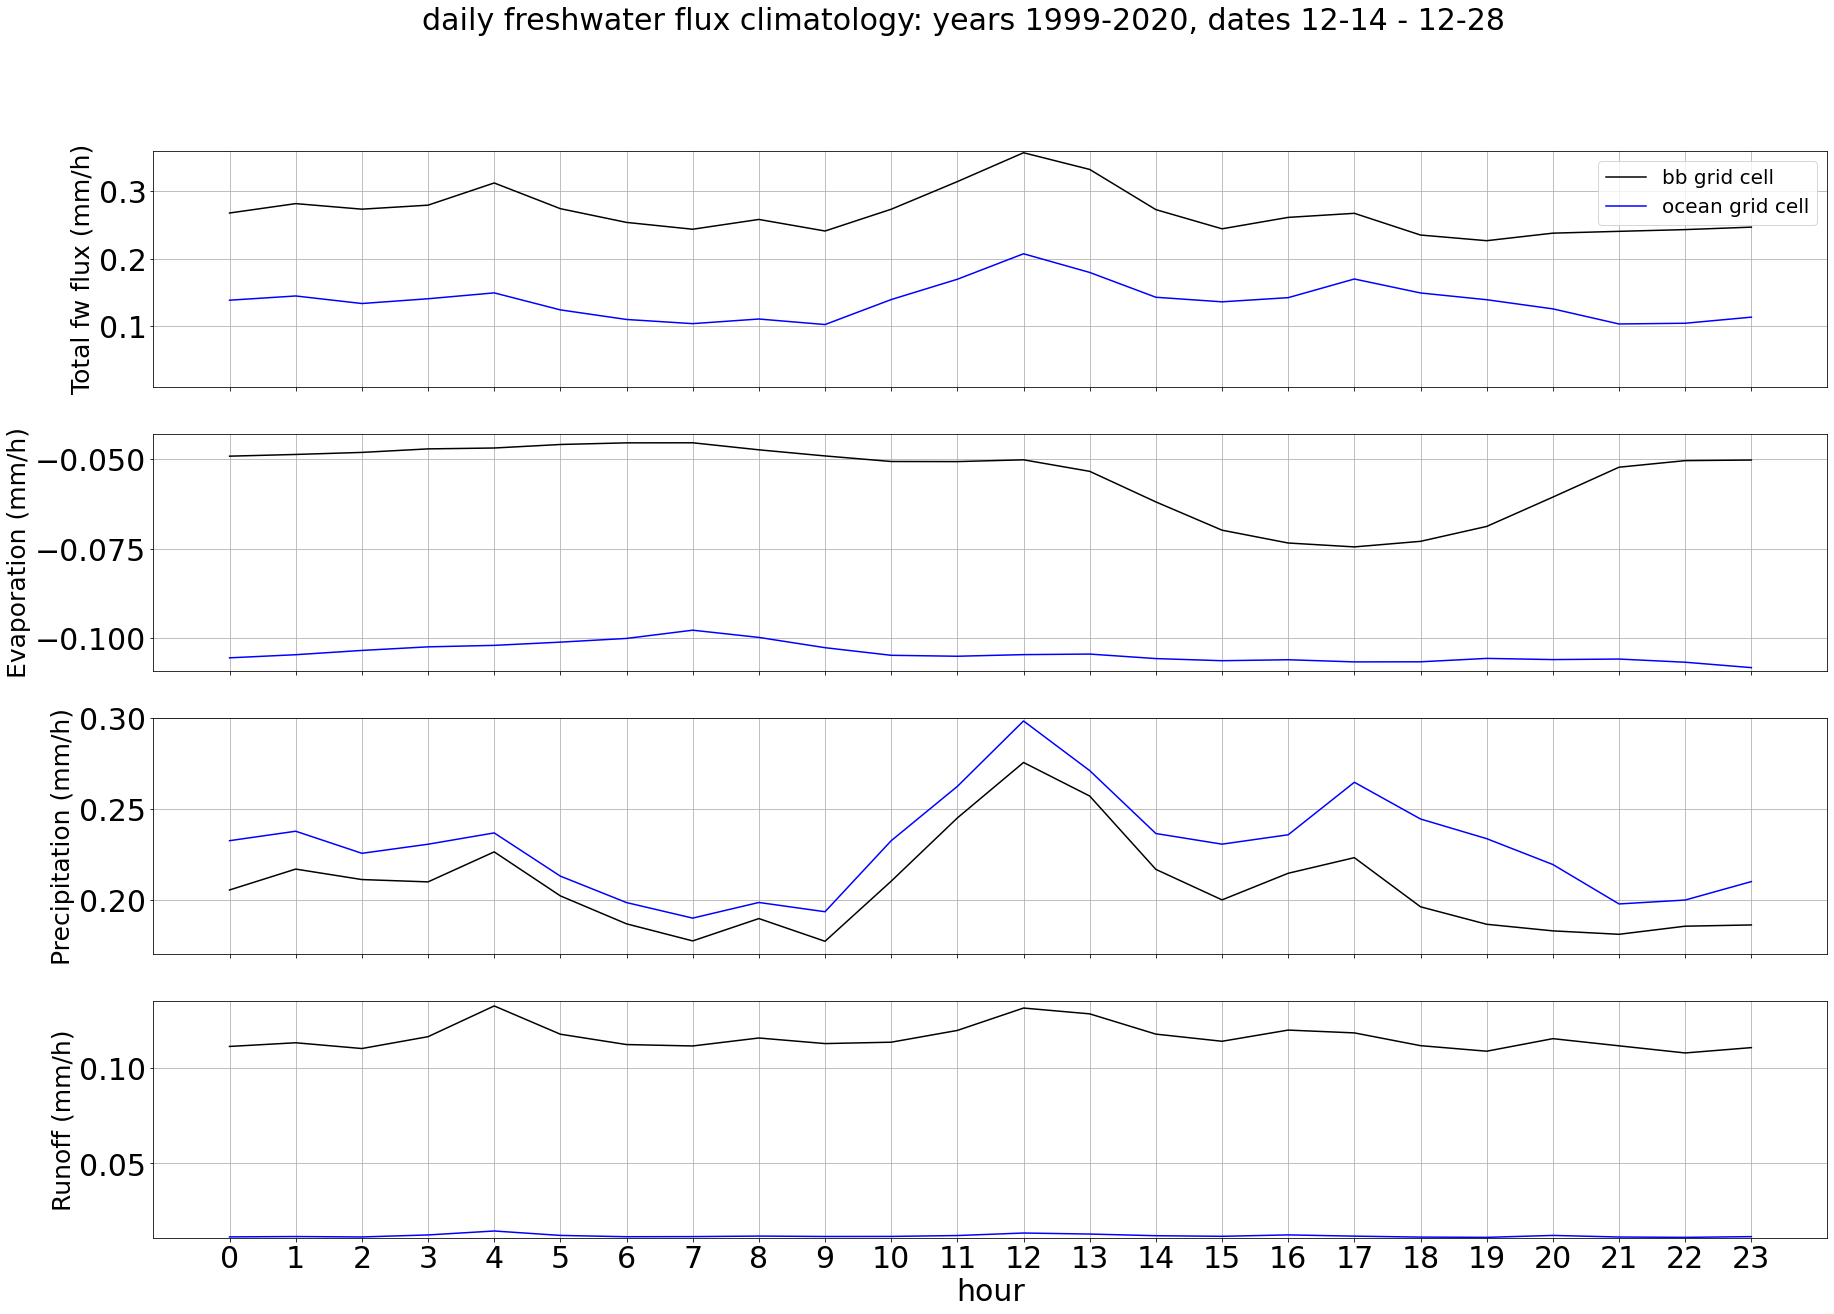

In [24]:
#
#Daily timeseries climatology for one week on either side of the solstices
#
plt.close()

#[164*24:178*24] is the index range for 1 week on either side of the summer solstice
#[347*24:361*24] is the index range for 1 week on either side of the winter solstice

#summer
##                FIGURE 11
f, ((ax1, ax2, ax3, ax4))=plt.subplots(4,1, sharey=False, sharex=True, figsize=(30,20))

ax1.plot(np.arange(24),np.nanmean(np.nanmean((d['nete']*1000)[:,1:3,1:3], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'k', label='bb grid cell')
ax1.plot(np.arange(24),np.nanmean(np.nanmean((d['nete']*1000)[:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'b', label='ocean grid cell')
ax1.legend(fontsize=20)
ax2.plot(np.arange(24),np.nanmean(np.nanmean((d['evap']*1000)[:,1:3,1:3], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'k')
ax2.plot(np.arange(24),np.nanmean(np.nanmean((d['evap']*1000)[:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'b')
ax3.plot(np.arange(24),np.nanmean(np.nanmean((d['precip']*1000)[:,1:3,1:3], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'k')
ax3.plot(np.arange(24),np.nanmean(np.nanmean((d['precip']*1000)[:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'b')
ax4.plot(np.arange(24),np.nanmean(np.nanmean((d['ro']*1000)[:,1:3,1:3], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'k')
ax4.plot(np.arange(24),np.nanmean(np.nanmean((d['ro']*1000)[:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'b')

ax1.set_ylim(-0.01, 0.230)
ax2.set_ylim(-0.225,0.005)
ax3.set_ylim(0.1,0.225)
ax4.set_ylim(0.0040, 0.070)

ax4.set_xticks(np.arange(24))
ax4.set_xlabel('hour', fontsize=30)
ax4.set_xticklabels(np.arange(24))

ax1.set_ylabel('Total fw flux (mm/h)', fontsize=25)
ax2.set_ylabel('Evaporation (mm/h)', fontsize=25)
ax3.set_ylabel('Precipitation (mm/h)', fontsize=25)
ax4.set_ylabel('Runoff (mm/h)', fontsize=25)

ax1.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
ax3.tick_params(labelsize=30)
ax4.tick_params(labelsize=30)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.suptitle('daily freshwater flux climatology: years 1999-2020, dates 06-14 - 06-28', fontsize=30)


#winter
##                FIGURE 12
f, ((ax1, ax2, ax3, ax4))=plt.subplots(4,1, sharey=False, sharex=True, figsize=(30,20))

ax1.plot(np.arange(24),np.nanmean(np.nanmean((d['nete']*1000)[:,1:3,1:3], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'k', label='bb grid cell')
ax1.plot(np.arange(24),np.nanmean(np.nanmean((d['nete']*1000)[:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'b', label='ocean grid cell')
ax1.legend(fontsize=20)
ax2.plot(np.arange(24),np.nanmean(np.nanmean((d['evap']*1000)[:,1:3,1:3], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'k', label='bb grid cell')
ax2.plot(np.arange(24),np.nanmean(np.nanmean((d['evap']*1000)[:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'b', label='ocean grid cell')
ax3.plot(np.arange(24),np.nanmean(np.nanmean((d['precip']*1000)[:,1:3,1:3], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'k')
ax3.plot(np.arange(24),np.nanmean(np.nanmean((d['precip']*1000)[:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'b')
ax4.plot(np.arange(24),np.nanmean(np.nanmean((d['ro']*1000)[:,1:3,1:3], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'k')
ax4.plot(np.arange(24),np.nanmean(np.nanmean((d['ro']*1000)[:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'b')

ax1.set_ylim(0.01, 0.360)
ax2.set_ylim(-0.109,-0.043)
ax3.set_ylim(0.17,0.3)
ax4.set_ylim(0.011, 0.135)

ax4.set_xticks(np.arange(24))
ax4.set_xlabel('hour', fontsize=30)
ax4.set_xticklabels(np.arange(24))

ax1.set_ylabel('Total fw flux (mm/h)', fontsize=25)
ax2.set_ylabel('Evaporation (mm/h)', fontsize=25)
ax3.set_ylabel('Precipitation (mm/h)', fontsize=25)
ax4.set_ylabel('Runoff (mm/h)', fontsize=25)

ax1.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
ax3.tick_params(labelsize=30)
ax4.tick_params(labelsize=30)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.suptitle('daily freshwater flux climatology: years 1999-2020, dates 12-14 - 12-28', fontsize=30)

In [6]:
#heat flux plots

Text(0.5, 0.98, '1999-2020 heat flux climatology (ocean grid cell) ')

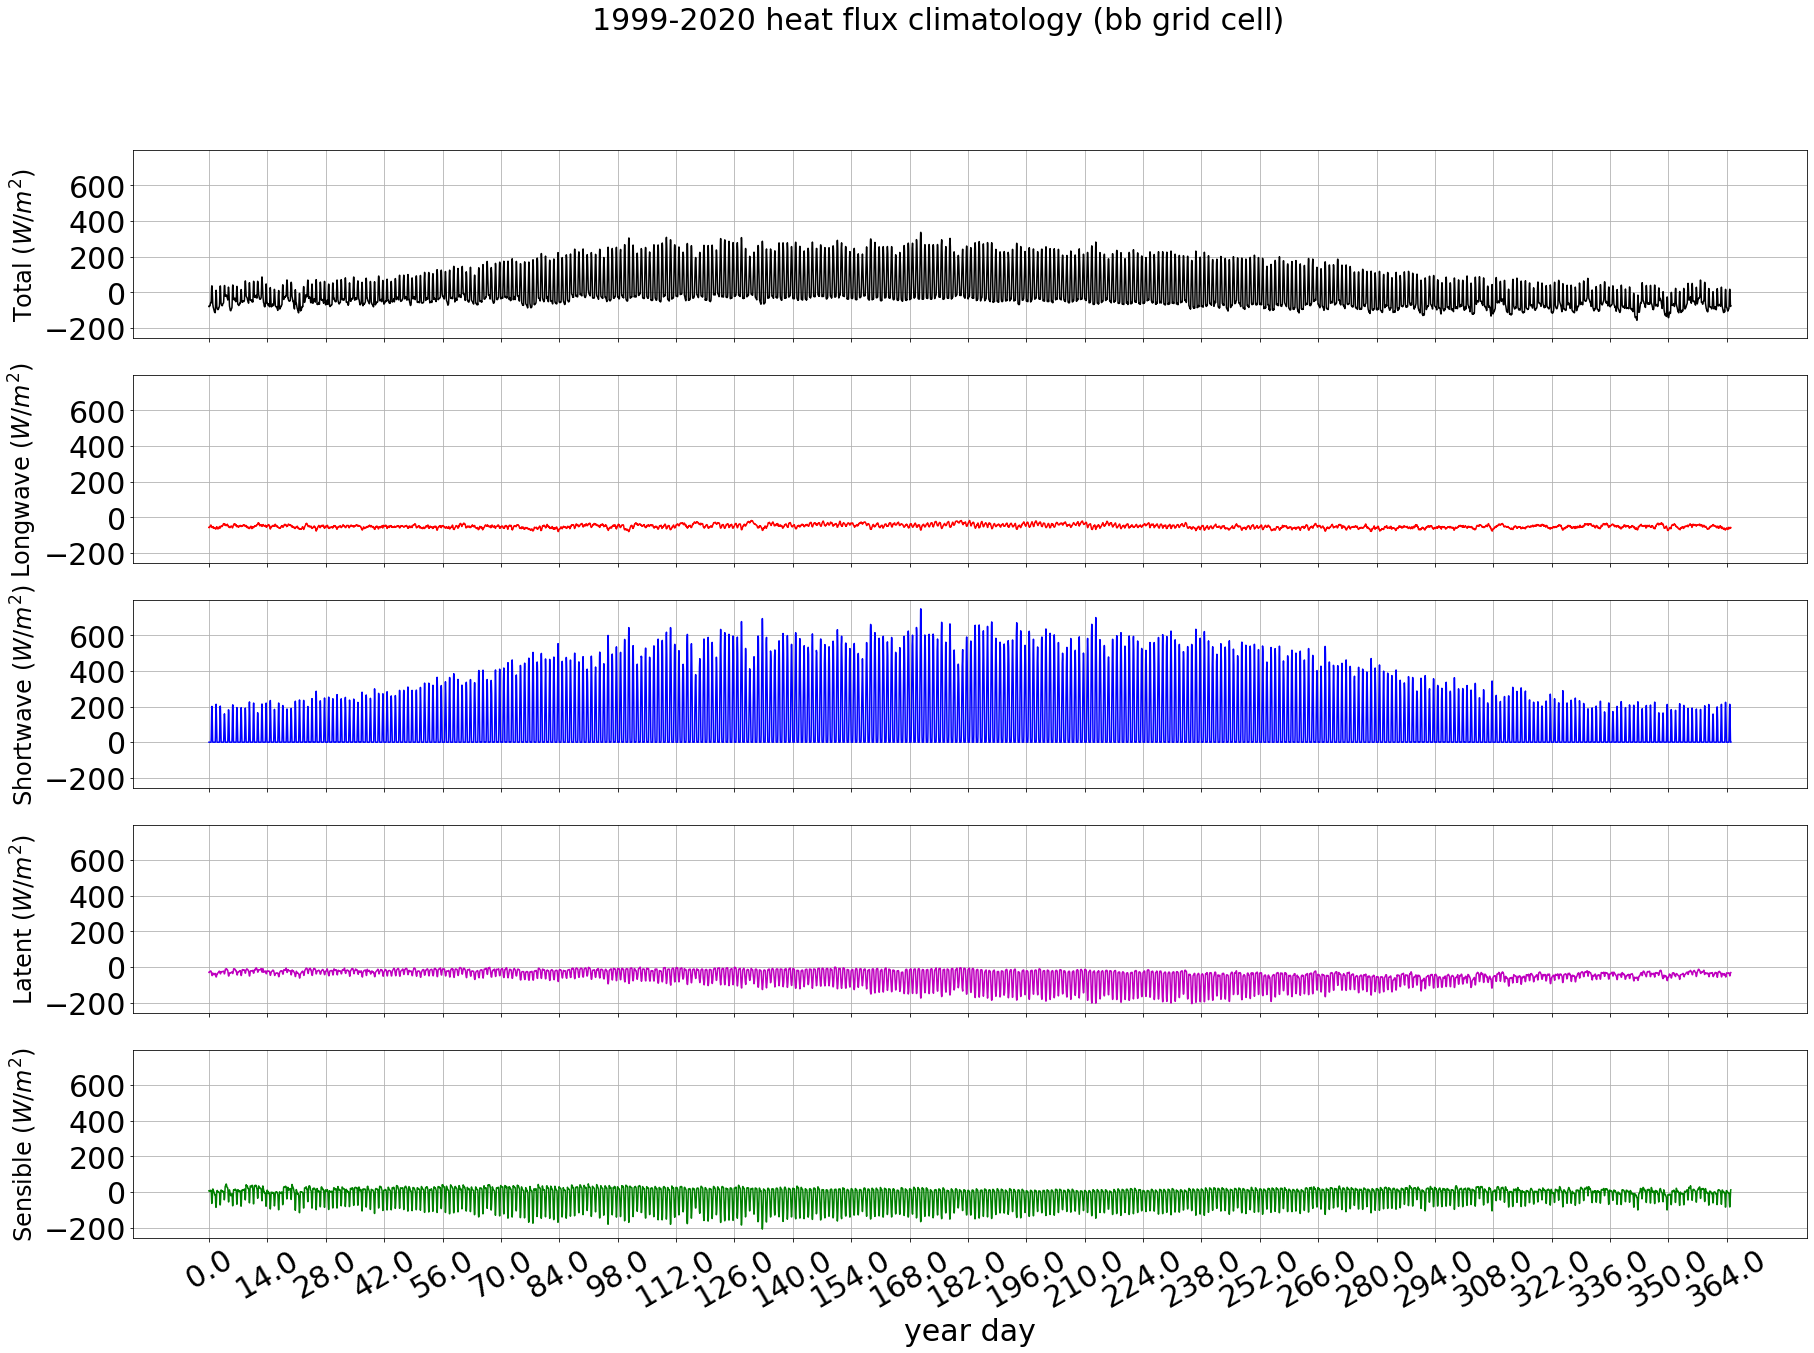

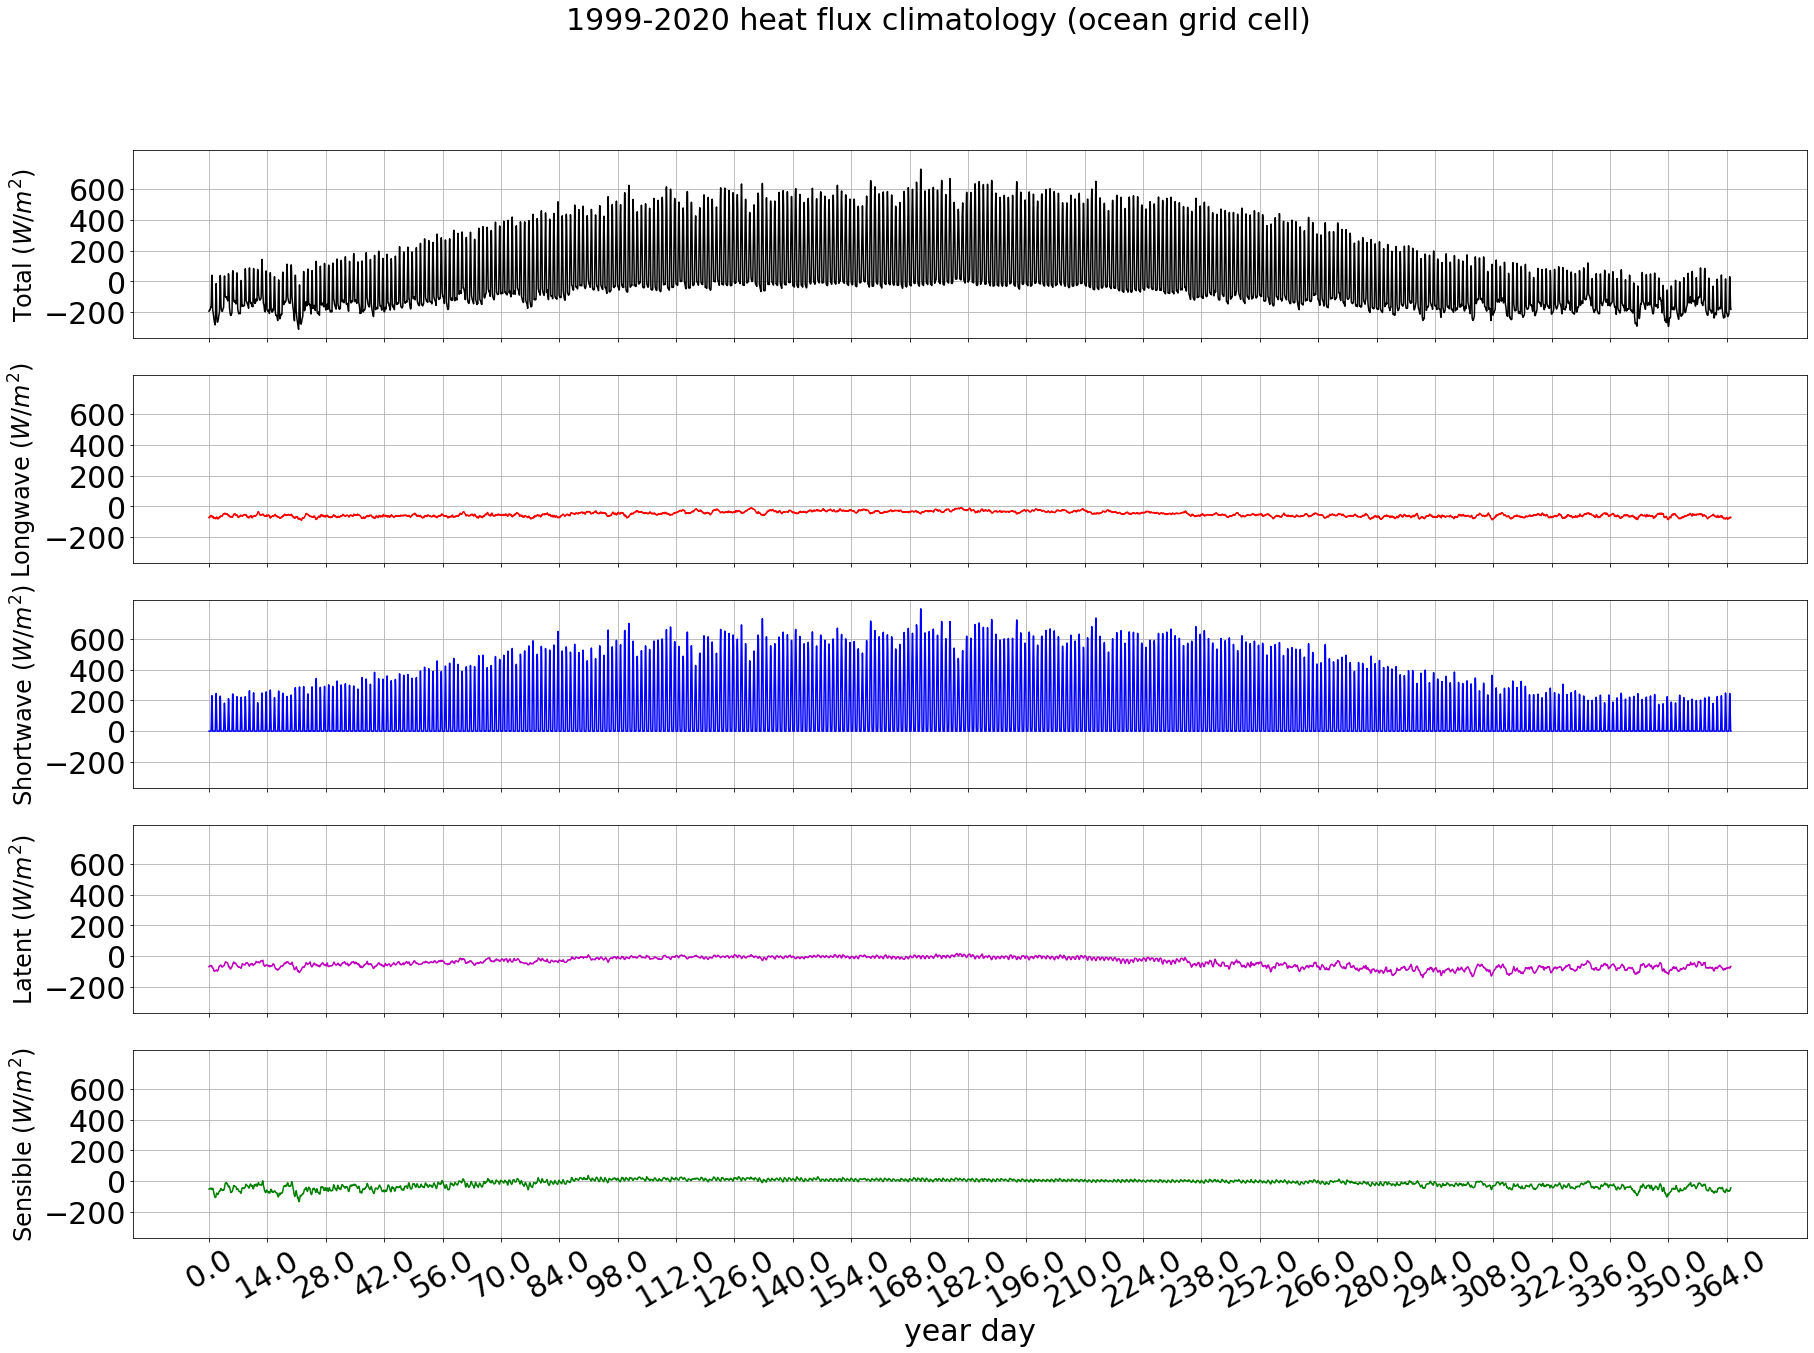

In [20]:
#Annual timeseries climatology
plt.close()

#bedford basin grid cell
##                FIGURE 5
f, ((ax1, ax2, ax3, ax4, ax5))=plt.subplots(5,1, sharey=True, sharex=True, figsize=(30,20))

ax1.plot(d['t'][0],np.nanmean(d['Q'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2)), 'k')
ax2.plot(d['t'][0],np.nanmean(d['Qlw'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2)), 'r')
ax3.plot(d['t'][0],np.nanmean(d['Qsw'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2)), 'b')
ax4.plot(d['t'][0],np.nanmean(d['Qlat'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2)), 'm')
ax5.plot(d['t'][0],np.nanmean(d['Qsen'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2)), 'g')
#ax1.legend(['Total', 'LW', 'SW', 'Latent.', 'Sensible'],prop={'size': 18}, labelspacing=0.0001)

ax5.set_xticks(d['t'][0][::24*14])
ax5.set_xlabel('year day', fontsize=30)
ax5.set_xticklabels(np.arange(24*365)[::24*14]/24, rotation=30)

ax1.set_yticks([-200,0,200,400,600])

ax1.set_ylabel('Total ($W/m^2$)', fontsize=24)
ax2.set_ylabel('Longwave ($W/m^2$)', fontsize=24)
ax3.set_ylabel('Shortwave ($W/m^2$)', fontsize=24)
ax4.set_ylabel('Latent ($W/m^2$)', fontsize=24)
ax5.set_ylabel('Sensible ($W/m^2$)', fontsize=24)

ax1.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
ax3.tick_params(labelsize=30)
ax4.tick_params(labelsize=30)
ax5.tick_params(labelsize=30)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
plt.suptitle('1999-2020 heat flux climatology (bb grid cell) ', fontsize=30)


#ocean grid cell
##                FIGURE 6
f, ((ax1, ax2, ax3, ax4, ax5))=plt.subplots(5,1, sharey=True, sharex=True, figsize=(30,20))

ax1.plot(d['t'][0],np.nanmean(d['Q'][:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2)), 'k')
ax2.plot(d['t'][0],np.nanmean(d['Qlw'][:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2)), 'r')
ax3.plot(d['t'][0],np.nanmean(d['Qsw'][:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2)), 'b')
ax4.plot(d['t'][0],np.nanmean(d['Qlat'][:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2)), 'm')
ax5.plot(d['t'][0],np.nanmean(d['Qsen'][:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2)), 'g')
#ax1.legend(['Total', 'LW', 'SW', 'Latent.', 'Sensible'],prop={'size': 18}, labelspacing=0.0001)

ax5.set_xticks(d['t'][0][::24*14])
ax5.set_xlabel('year day', fontsize=30)
ax5.set_xticklabels(np.arange(24*365)[::24*14]/24, rotation=30)

ax1.set_yticks([-200,0,200,400,600])

ax1.set_ylabel('Total ($W/m^2$)', fontsize=24)
ax2.set_ylabel('Longwave ($W/m^2$)', fontsize=24)
ax3.set_ylabel('Shortwave ($W/m^2$)', fontsize=24)
ax4.set_ylabel('Latent ($W/m^2$)', fontsize=24)
ax5.set_ylabel('Sensible ($W/m^2$)', fontsize=24)

ax1.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
ax3.tick_params(labelsize=30)
ax4.tick_params(labelsize=30)
ax5.tick_params(labelsize=30)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
plt.suptitle('1999-2020 heat flux climatology (ocean grid cell) ', fontsize=30)

Text(0.5, 0.98, 'daily heat flux climatology: years 1999-2020, dates 12-14 - 12-28  ')

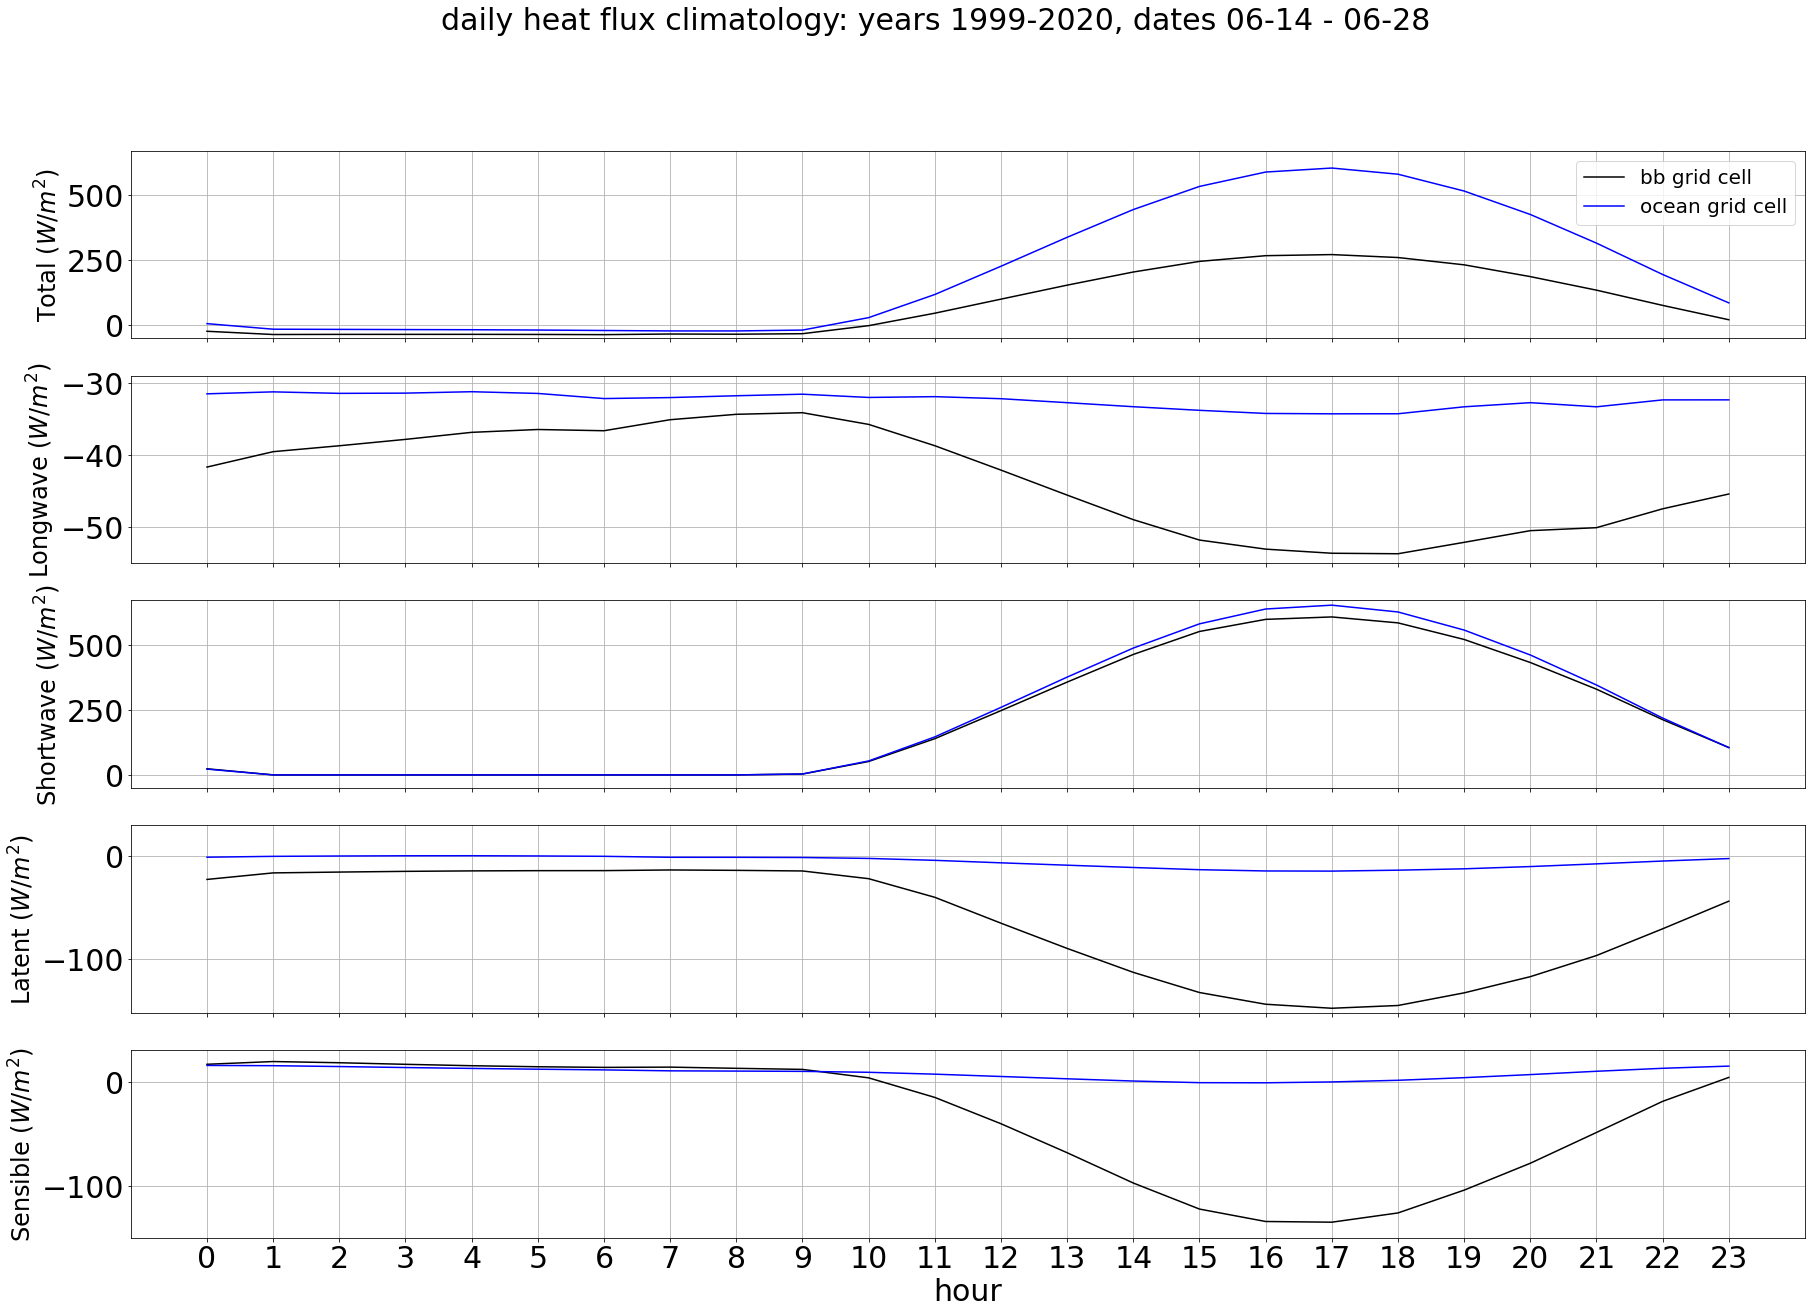

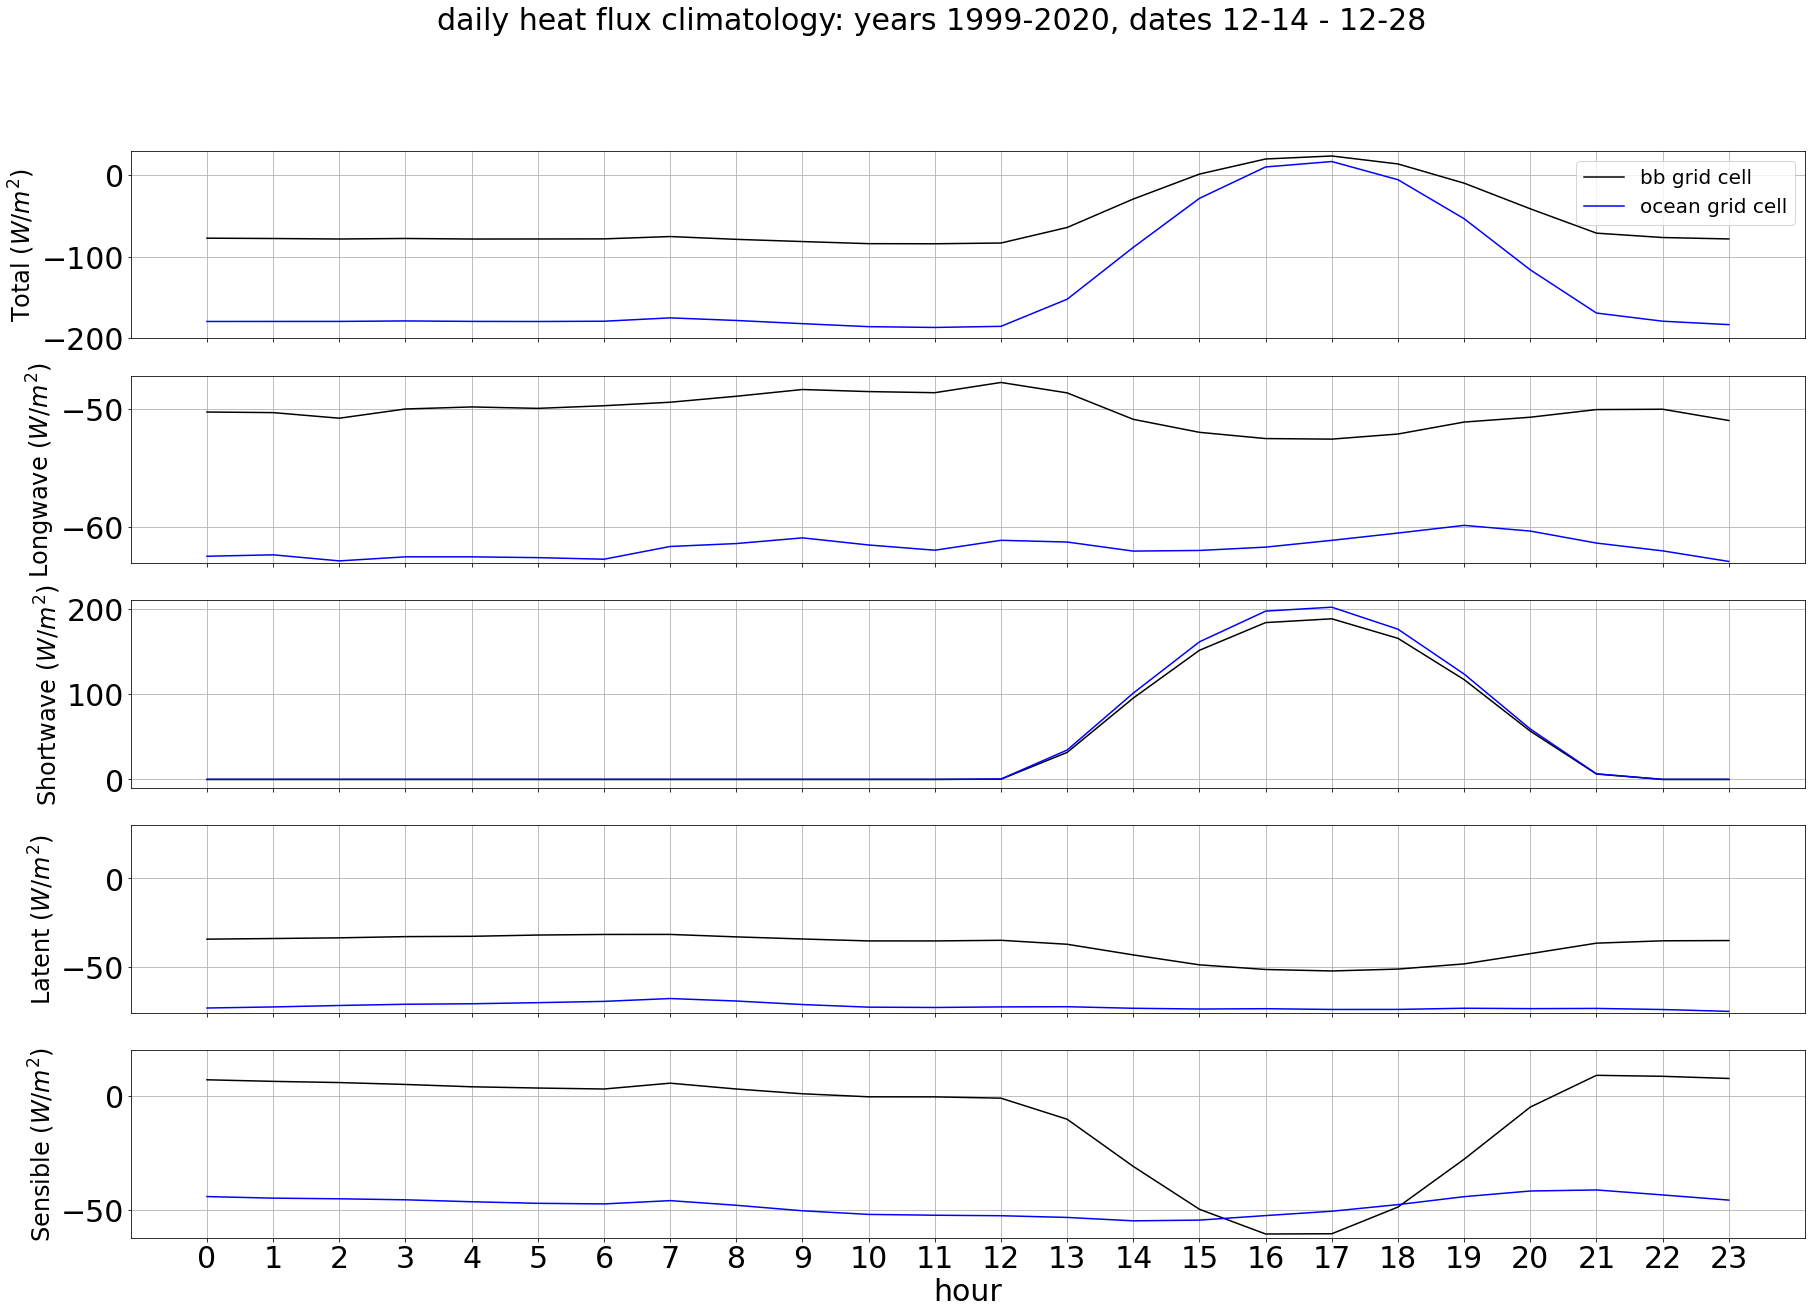

In [25]:
#
#Daily timeseries climatology for one week on either side of the solstices
#

#summer
##                FIGURE 7
f, ((ax1, ax2, ax3, ax4, ax5))=plt.subplots(5,1, sharey=False, sharex=True, figsize=(30,20))

ax1.plot(np.arange(24),np.nanmean(np.nanmean(d['Q'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'k', label='bb grid cell')
ax1.plot(np.arange(24),np.nanmean(np.nanmean(d['Q'][:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'b', label='ocean grid cell')
ax1.legend(fontsize=20)
ax2.plot(np.arange(24),np.nanmean(np.nanmean(d['Qlw'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'k')
ax2.plot(np.arange(24),np.nanmean(np.nanmean(d['Qlw'][:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'b')
ax3.plot(np.arange(24),np.nanmean(np.nanmean(d['Qsw'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'k')
ax3.plot(np.arange(24),np.nanmean(np.nanmean(d['Qsw'][:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'b')
ax4.plot(np.arange(24),np.nanmean(np.nanmean(d['Qlat'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'k')
ax4.plot(np.arange(24),np.nanmean(np.nanmean(d['Qlat'][:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'b')
ax5.plot(np.arange(24),np.nanmean(np.nanmean(d['Qsen'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'k')
ax5.plot(np.arange(24),np.nanmean(np.nanmean(d['Qsen'][:,ocean_lat_bounds, ocean_lon_bounds], axis=(1,2))[164*24:178*24].reshape(14,24), axis=0), 'b')

ax1.set_ylim(-50,670)
ax2.set_ylim(-55,-29)
ax3.set_ylim(-50,670)
ax4.set_ylim(-152,30)
ax5.set_ylim(-150,30)

ax5.set_xticks(np.arange(24))
ax5.set_xlabel('hour', fontsize=30)
ax5.set_xticklabels(np.arange(24))

ax1.set_ylabel('Total ($W/m^2$)', fontsize=24)
ax2.set_ylabel('Longwave ($W/m^2$)', fontsize=24)
ax3.set_ylabel('Shortwave ($W/m^2$)', fontsize=24)
ax4.set_ylabel('Latent ($W/m^2$)', fontsize=24)
ax5.set_ylabel('Sensible ($W/m^2$)', fontsize=24)

ax1.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
ax3.tick_params(labelsize=30)
ax4.tick_params(labelsize=30)
ax5.tick_params(labelsize=30)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
plt.suptitle('daily heat flux climatology: years 1999-2020, dates 06-14 - 06-28 ', fontsize=30)


#winter
##                FIGURE 8
f, ((ax1, ax2, ax3, ax4, ax5))=plt.subplots(5,1, sharey=False, sharex=True, figsize=(30,20))

ax1.plot(np.arange(24),np.nanmean(np.nanmean(d['Q'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'k', label='bb grid cell')
ax1.plot(np.arange(24),np.nanmean(np.nanmean(d['Q'][:,ocean_lat_bounds,ocean_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'b', label='ocean grid cell')
ax1.legend(fontsize=20)
ax2.plot(np.arange(24),np.nanmean(np.nanmean(d['Qlw'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'k')
ax2.plot(np.arange(24),np.nanmean(np.nanmean(d['Qlw'][:,ocean_lat_bounds,ocean_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'b')
ax3.plot(np.arange(24),np.nanmean(np.nanmean(d['Qsw'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'k')
ax3.plot(np.arange(24),np.nanmean(np.nanmean(d['Qsw'][:,ocean_lat_bounds,ocean_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'b')
ax4.plot(np.arange(24),np.nanmean(np.nanmean(d['Qlat'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'k')
ax4.plot(np.arange(24),np.nanmean(np.nanmean(d['Qlat'][:,ocean_lat_bounds,ocean_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'b')
ax5.plot(np.arange(24),np.nanmean(np.nanmean(d['Qsen'][:,bb_lat_bounds,bb_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'k')
ax5.plot(np.arange(24),np.nanmean(np.nanmean(d['Qsen'][:,ocean_lat_bounds,ocean_lon_bounds], axis=(1,2))[347*24:361*24].reshape(14,24), axis=0), 'b')

ax1.set_ylim(-200,30)
ax2.set_ylim(-63,-47.2)
ax3.set_ylim(-10,210)
ax4.set_ylim(-76,30)
ax5.set_ylim(-62,20)

ax5.set_xticks(np.arange(24))
ax5.set_xlabel('hour', fontsize=30)
ax5.set_xticklabels(np.arange(24))

ax1.set_ylabel('Total ($W/m^2$)', fontsize=24)
ax2.set_ylabel('Longwave ($W/m^2$)', fontsize=24)
ax3.set_ylabel('Shortwave ($W/m^2$)', fontsize=24)
ax4.set_ylabel('Latent ($W/m^2$)', fontsize=24)
ax5.set_ylabel('Sensible ($W/m^2$)', fontsize=24)

ax1.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
ax3.tick_params(labelsize=30)
ax4.tick_params(labelsize=30)
ax5.tick_params(labelsize=30)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
plt.suptitle('daily heat flux climatology: years 1999-2020, dates 12-14 - 12-28  ', fontsize=30)

Text(0.5, 0.98, 'Winter mean heat flux 1999-2020')

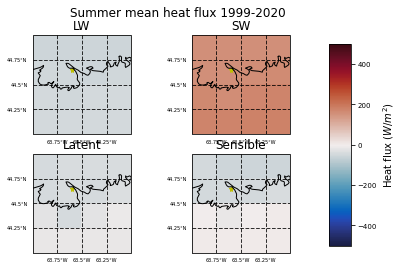

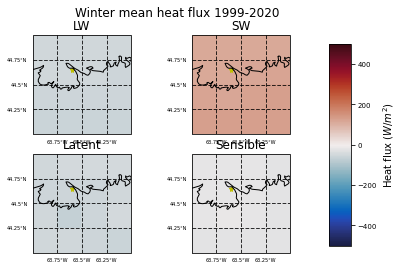

In [11]:
#
#map of seasonal mean heat flux
#

#set clorbar limits
hf_cbar_max=500
hf_cbar_min=-500

plt.close()
#summer
##                FIGURE 3
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([-64, -63, 44, 45], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, facecolor='tab:gray')
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.add_feature(cfeature.RIVERS)
ax1.add_feature(cfeature.COASTLINE, zorder=11)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='--', zorder=101)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-63.75, -63.5, -63.25])
gl.ylocator = mticker.FixedLocator([44.75, 44.5, 44.25])
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 5, 'color': 'black'}
gl.ylabel_style = {'size': 5, 'color': 'black'}
hfx_lon, hfx_lat = -63.598999, 44.646769
ax1.plot(hfx_lon, hfx_lat, '*', markersize=5, c='y', zorder=10)
lon, lat = np.meshgrid(d['lon'], d['lat'])
cs1 = ax1.pcolormesh(lon, lat, np.nanmean(d['Qlw'][1416:3624], axis=0), vmin=hf_cbar_min, vmax=hf_cbar_max, cmap=cmocean.cm.balance)
ax1.set_title('LW')


ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([-64, -63, 44, 45], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, facecolor='tab:gray')
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.add_feature(cfeature.RIVERS)
ax2.add_feature(cfeature.COASTLINE, zorder=11)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='--', zorder=101)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-63.75, -63.5, -63.25])
gl.ylocator = mticker.FixedLocator([44.75, 44.5, 44.25])
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 5, 'color': 'black'}
gl.ylabel_style = {'size': 5, 'color': 'black'}
ax2.plot(hfx_lon, hfx_lat, '*', markersize=5, c='y', zorder=10)
lon, lat = np.meshgrid(d['lon'], d['lat'])
cs2= ax2.pcolormesh(lon, lat, np.nanmean(d['Qsw'][1416:3624], axis=0), vmin=hf_cbar_min, vmax=hf_cbar_max, cmap=cmocean.cm.balance)
ax2.set_title('SW')

ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.set_extent([-64, -63, 44, 45], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, facecolor='tab:gray')
ax3.add_feature(cfeature.LAKES, alpha=0.5)
ax3.add_feature(cfeature.RIVERS)
ax3.add_feature(cfeature.COASTLINE, zorder=11)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='--', zorder=101)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-63.75, -63.5, -63.25])
gl.ylocator = mticker.FixedLocator([44.75, 44.5, 44.25])
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 5, 'color': 'black'}
gl.ylabel_style = {'size': 5, 'color': 'black'}
ax3.plot(hfx_lon, hfx_lat, '*', markersize=5, c='y', zorder=10)
lon, lat = np.meshgrid(d['lon'], d['lat'])
cs3 = ax3.pcolormesh(lon, lat, np.nanmean(d['Qlat'][1416:3624], axis=0), vmin=hf_cbar_min, vmax=hf_cbar_max, cmap=cmocean.cm.balance)
ax3.set_title('Latent')

ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.set_extent([-64, -63, 44, 45], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, facecolor='tab:gray')
ax4.add_feature(cfeature.LAKES, alpha=0.5)
ax4.add_feature(cfeature.RIVERS)
ax4.add_feature(cfeature.COASTLINE, zorder=11)
ax4.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='--', zorder=101)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-63.75, -63.5, -63.25])
gl.ylocator = mticker.FixedLocator([44.75, 44.5, 44.25])
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 5, 'color': 'black'}
gl.ylabel_style = {'size': 5, 'color': 'black'}
ax4.plot(hfx_lon, hfx_lat, '*', markersize=5, c='y', zorder=10)
lon, lat = np.meshgrid(d['lon'], d['lat'])
cs4 = ax4.pcolormesh(lon, lat, np.nanmean(d['Qsen'][1416:3624], axis=0), vmin=hf_cbar_min, vmax=hf_cbar_max, cmap=cmocean.cm.balance)
ax4.set_title('Sensible')


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
H=fig.colorbar(cs4, cax=cbar_ax)

H.set_label('Heat flux ($W/m^2$)')
H.ax.tick_params(labelsize=7)
plt.suptitle('Summer mean heat flux 1999-2020')




#winter
##                FIGURE 4
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([-64, -63, 44, 45], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, facecolor='tab:gray')
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.add_feature(cfeature.RIVERS)
ax1.add_feature(cfeature.COASTLINE, zorder=11)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='--', zorder=101)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-63.75, -63.5, -63.25])
gl.ylocator = mticker.FixedLocator([44.75, 44.5, 44.25])
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 5, 'color': 'black'}
gl.ylabel_style = {'size': 5, 'color': 'black'}
hfx_lon, hfx_lat = -63.598999, 44.646769
ax1.plot(hfx_lon, hfx_lat, '*', markersize=5, c='y', zorder=10)
lon, lat = np.meshgrid(d['lon'], d['lat'])
cs1 = ax1.pcolormesh(lon, lat, np.nanmean(np.append(d['Qlw'][:1416],d['Qlw'][3624:], axis=0), axis=0), vmin=hf_cbar_min, vmax=hf_cbar_max, cmap=cmocean.cm.balance)
ax1.set_title('LW')


ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([-64, -63, 44, 45], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, facecolor='tab:gray')
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.add_feature(cfeature.RIVERS)
ax2.add_feature(cfeature.COASTLINE, zorder=11)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='--', zorder=101)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-63.75, -63.5, -63.25])
gl.ylocator = mticker.FixedLocator([44.75, 44.5, 44.25])
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 5, 'color': 'black'}
gl.ylabel_style = {'size': 5, 'color': 'black'}
ax2.plot(hfx_lon, hfx_lat, '*', markersize=5, c='y', zorder=10)
lon, lat = np.meshgrid(d['lon'], d['lat'])
cs2= ax2.pcolormesh(lon, lat, np.nanmean(np.append(d['Qsw'][:1416], d['Qsw'][3624:], axis=0), axis=0), vmin=hf_cbar_min, vmax=hf_cbar_max, cmap=cmocean.cm.balance)
ax2.set_title('SW')

ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.set_extent([-64, -63, 44, 45], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, facecolor='tab:gray')
ax3.add_feature(cfeature.LAKES, alpha=0.5)
ax3.add_feature(cfeature.RIVERS)
ax3.add_feature(cfeature.COASTLINE, zorder=11)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='--', zorder=101)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-63.75, -63.5, -63.25])
gl.ylocator = mticker.FixedLocator([44.75, 44.5, 44.25])
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 5, 'color': 'black'}
gl.ylabel_style = {'size': 5, 'color': 'black'}
ax3.plot(hfx_lon, hfx_lat, '*', markersize=5, c='y', zorder=10)
lon, lat = np.meshgrid(d['lon'], d['lat'])
cs3 = ax3.pcolormesh(lon, lat, np.nanmean(np.append(d['Qlat'][:1416], d['Qlat'][3624:], axis=0), axis=0), vmin=hf_cbar_min, vmax=hf_cbar_max, cmap=cmocean.cm.balance)
ax3.set_title('Latent')

ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.set_extent([-64, -63, 44, 45], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, facecolor='tab:gray')
ax4.add_feature(cfeature.LAKES, alpha=0.5)
ax4.add_feature(cfeature.RIVERS)
ax4.add_feature(cfeature.COASTLINE, zorder=11)
ax4.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='--', zorder=101)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-63.75, -63.5, -63.25])
gl.ylocator = mticker.FixedLocator([44.75, 44.5, 44.25])
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 5, 'color': 'black'}
gl.ylabel_style = {'size': 5, 'color': 'black'}
ax4.plot(hfx_lon, hfx_lat, '*', markersize=5, c='y', zorder=10)
lon, lat = np.meshgrid(d['lon'], d['lat'])
cs4 = ax4.pcolormesh(lon, lat, np.nanmean(np.append(d['Qsen'][:1416], d['Qsen'][3624:], axis=0), axis=0), vmin=hf_cbar_min, vmax=hf_cbar_max, cmap=cmocean.cm.balance)
ax4.set_title('Sensible')


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
H=fig.colorbar(cs4, cax=cbar_ax)

H.set_label('Heat flux ($W/m^2$)')
H.ax.tick_params(labelsize=7)
plt.suptitle('Winter mean heat flux 1999-2020')